In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [104]:
data = pd.read_table("RNALevelDownUpboxplot.txt", sep='\t')
#celllines = ['zygote', 'early', '2cell', '4cell', '8cell', 'ICM', 'mESC']
celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM']
#celllines = ['MII', 'zygote', 'early', '2cell', '4cell', '8cell', 'ICM', 'mESC']

data_type = 'level'
plot_title = "RNA Editing Gene Edit level"
first = 'down'
second = 'up'
output = 'RANLevelNN.png'

paintdata_p = []
paintdata_n = []
pvalue = []
for cell in celllines:
    p = data.loc[(data['stage']==cell) & (data['type'] == first)][data_type].values
    n = data.loc[(data['stage']==cell) & (data['type'] == second)][data_type].values
    #psum = p.sum()
    #nsum = n.sum()
    stat, pv = stats.ttest_ind(p,n, equal_var = False)
    pvalue.append(round(pv,2))
    paintdata_p.append(p)
    paintdata_n.append(n)
    #print(cell, pv)#, psum, nsum)

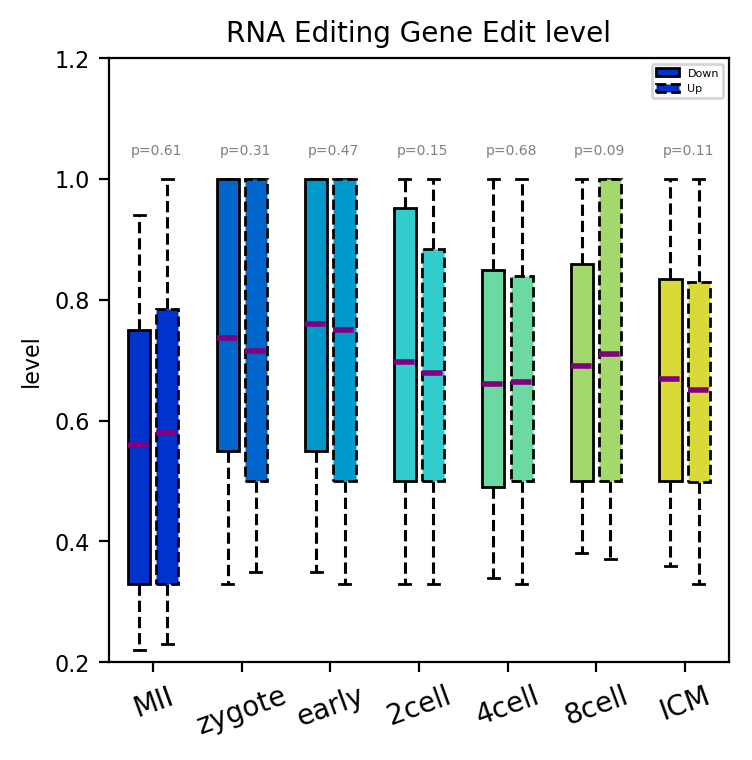

In [105]:
plen = len(paintdata_p)
#colorBar1 = [[0.91000,0.3000000000000,0.200] for i in range(plen)]
#colorBar2 = [[0.300000000000000,0.500000000000000,0.700] for i in range(plen)]

colorBar1 = [[0,0.2,0.8],[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125]]
#colorBar1 = [[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125],[0.95,0.75,0.0]]
#colorBar1 = [[0,0.2,0.8],[0.0,0.4,0.8],[0.0,0.6,0.8],[0.2,0.8,0.8],[0.425,0.85,0.6375],[0.6375,0.85,0.425],[0.85,0.85,0.22125],[0.95,0.75,0.0]]

x1 = [i*2-0.32 for i in range(plen)]
x2 = [i*2+0.32 for i in range(plen)]

plt.figure(figsize=(4, 4), dpi=200)

boxprops = {'linewidth':1.0 , 'color':'black'}
meanlineprops = dict(linestyle='--', linewidth=2.0, color='purple')
whiskerprops = {'linestyle': '--', 'linewidth':1.1, 'color': 'black'}
medianprops = {'linewidth':0.0 , 'color': 'black', 'drawstyle' : 'steps'}
bp1 = plt.boxplot(paintdata_p, boxprops=boxprops, positions=x1, showfliers=False, showmeans=True, meanprops=meanlineprops, meanline =True, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])
#bp1 = plt.boxplot(paintdata_p, boxprops=boxprops, positions=x1, showfliers=False, meanline =False, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])
for patch, color in zip(bp1['boxes'], colorBar1):
    patch.set_facecolor(color)
# for patch, color in zip(bp1['medians'], colorBar1):
#     patch.set_color(color)
    
boxprops = {'linewidth':1.0 , 'color':'black'}    
meanlineprops = dict(linestyle='--', linewidth=2.0, color='purple')
whiskerprops = {'linestyle': '--', 'linewidth':1.1, 'color': 'black'}
medianprops = {'linewidth':0.0 , 'color': 'black', 'drawstyle' : 'steps'}
bp2 = plt.boxplot(paintdata_n, boxprops=boxprops,positions=x2, showfliers=False, showmeans=True, meanprops=meanlineprops, meanline =True, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])# labels=labels, 
#bp2 = plt.boxplot(paintdata_n, boxprops=boxprops,positions=x2, showfliers=False, meanline =False, patch_artist = True, whiskerprops = whiskerprops, medianprops = medianprops,widths = 0.5,whis = [10, 90])
for patch, color in zip(bp2['boxes'], colorBar1):
    patch.set_facecolor(color)
    patch.set_linestyle('--')
# for patch, color in zip(bp2['medians'], colorBar1):
#     patch.set_color(color)
#     patch.set_alpha(0.0)

plt.xticks([i*2 for i in range(plen)],celllines, rotation = 20) 
style=dict(size=5, color='gray')
for i in range(plen):
    plt.text(i*2-0.5, 1.04, "p="+str(pvalue[i]), **style)
    
plt.yticks(fontsize=8)
plt.xlim(-1,13)
plt.ylim(0.2, 1.2)
plt.title(plot_title, fontsize=10)
plt.ylabel(data_type, fontsize=8)
plt.grid(False)
plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Down', 'Up'], loc='upper right',prop={'size':4})
plt.savefig(output)